# Review of Linear Algebra and Geometry

We start our exploration of mathematics for machine learning with a refresher on convexity and, in general, the linear algebra that's commonly used in the subject.

## Convexity

Set convexity is defined as follows:

> **Definition:** &nbsp; A set $C \subseteq \mathbb{R^d}$ is **convex** if, for all points $x_1,x_2 \in C$ and any $\theta \in [0,1]$, the point $\theta x_1 + (1-\theta) x_2$

That is, a set is convex if the parametrized line segment between $x_1$ and $x_2$, any two points in the set, is also entirely within the set.
<br>


### Some Operations that Preserve Convexity

Scaling, skewing, and rotation (i.e. *linear transformations*) preserve convexity, as do *affine transformations* (i.e. shifting). Let the matrix $A$ define such a transformation, and $b$ be a shift vector. Then $C' = \{Ax + b : x \in C \}$ is convex provided that $C$ was convex.

An *intersection* of convex sets is also convex. That is, $C' = \{ x : x \in C_1 \cap x \in C_2 \}$ is convex provided that $C_1$ and $C_2$ were convex to begin with. The proof follows directly from the definition of intersection.

However, *unions* of convex sets need not be convex.

## Examples of Convex Sets

The following are some common convex sets we will come across in practice.

### Convex Hull of $n$ Points

> Note: A *point* and a *vector* mean the same thing for the purposes of the discussion that follows.
<br>

A *convex combination* of points $x_1, ..., x_n$ is a point of the form $x = \theta_1 x_1 + ... + \theta_n x_n$ where $\sum_{i = 1}^{n} \theta_i = 1$ and $\theta_i \geq 0 \ \ \forall i$.

Let $x_1,x_2,...,x_n$ be $n$ points in space. Their *convex hull* is the set of all points which can be written as some convex combination of them. Equivalently, by varying the $\theta_i$'s we generate the convex hull as the set of all convex combinations of these points.

The convex hull can be visualized as the closed polygon formed when a rubber band is stretched around the $n$ points. The convex hull of two points is the line segment joining them. That of three points is the polygon (complete with its inner region). In general, for $n$ points, the concept generalizes to an $n$-dimensional polygon.

Formally, the convex hull is the set $\{ \theta_1 x_1 + ... + \theta_n x_n : \theta_1 + ... + \theta_n = 1 \ \ \textrm{and} \ \ \theta_i \geq 0 \ \ \forall i \}$

> Note: A handy interactive visualization, along with an efficient algorithm that generates a convex hull of $n$ points on a 2D plane can be found in the following [blog post](https://www.jgibson.id.au/articles/convex-hull/) by Joel Gibson.
<br>

### Convex Hull of a Set

The convex hull of a set can be similarly defined as all the convex combinations of the elements in the set. However, since the set may contain infinite elements there's an easier, equivalent definition in terms of supersets.

Let $C$ be a non-convex set. The convex hull of $C$ is the intersection of all convex supersets of $C$. That is, it's the intersection of all convex sets containing $C$. The result of such an intersection will be the unique $^{(†)}$ smallest convex superset of $C$, its convex hull. 

::: {.column-margin}
() **Proof of uniqueness:** Let $C_1$ and $C_2$ be two convex hulls of $C$.  Let $c_1 \in C_1$ be a point. Since $c_1 \in C_1$, $c_1 \in$ at least one of the convex supersets $C^{i}$of $C$. Hence, $c_1 \in C_2$ since $C_2 = \bigcap^{i=1 \to n}C^{i}$. Similarly, it can be shown that any $c_2 \in C_2$ also belongs to $C_1$. 
Hence, $C_1 \subseteq C_2$ and vice versa. This proves that $C_1 = C_2$ and, in doing so, completes this proof of uniqueness. 
:::

Visualizing the convex hull of a non-convex set is similar to visualizing that of $n$ points — it's simply the shape enclosed by a rubber band stretched around the non-convex set.

### Affine Combination of $n$ Points

An *affine combination* of points $x_1,...,x_n$ is a point of the form $x = \theta_1 x_1 + ... + \theta_n x_n$ with $\sum_{i=1}^{n}\theta_i = 1$ but where the $\theta_i$'s need not be non-negative. 

For a single point, the set of all affine combinations is the singleton set with the point itself. For two points, it's the *line* that passes through them, and for three points it's the *plane*. In general, it is the plane in $n$-dimensions passing through the $n$ points.

interactive(children=(IntSlider(value=50, description='dots', min=1), Dropdown(description='colr', options=('r…

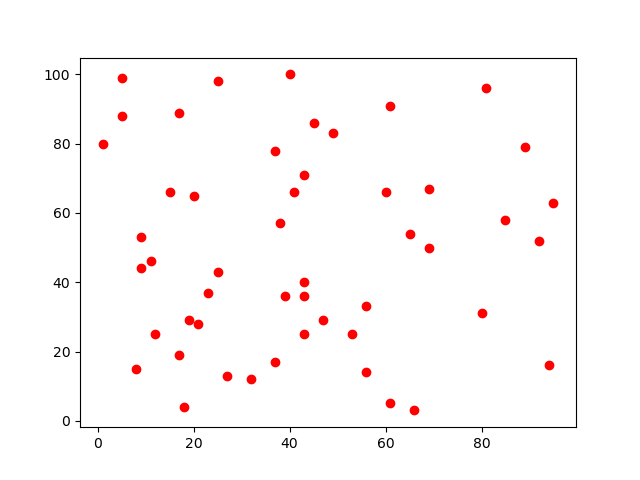

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import AppLayout, FloatSlider
%matplotlib widget

# # Slider
# a1_slide = plt.axes([1.0, 0.1, 0.65, 0.03]) # x_pos, y_pos, width, height of slider/button 
# a1 = Slider(a1_slide, "a1", valmin=0.1, valmax=1, valinit=0.5, valstep=0.05) # slider, description, min_val, max_val, init_val, step
# a2_slide = plt.axes([1.0, 0.2, 0.65, 0.03])
# a2 = Slider(a2_slide, "a2", valmin=0.1, valmax=1, valinit=0.5, valstep=0.05)

# # The function to be called anytime a slider's value changes
# def update_a1(val):
#     a2 =  1-a1
#     p.set_ydata(x2(x1))
#     fig.canvas.draw_idle()

# def update_a2(val):
#     a1 =  1-a2
#     p.set_ydata(x2(x1))
#     fig.canvas.draw_idle()

# # register the update function with each slider
# a1.on_changed(update_a1)
# a2.on_changed(update_a2)

# # Affine combination with its weights
# x1 = np.linspace(1,10,20)
# x2 = lambda x1: 1/a2.val - (a1.val/a2.val)*x1

# # Plot
# fig = plt.figure()
# ax = fig.subplots()
# p = ax.plot(x1,x2(x1))
# plt.show()

# When using the `widget` backend from ipympl,
# fig.canvas is a proper Jupyter interactive widget, which can be embedded in
# an ipywidgets layout. See https://ipywidgets.readthedocs.io/en/stable/examples/Layout%20Templates.html

# One can bound figure attributes to other widget values.
from ipywidgets import AppLayout, FloatSlider

plt.ioff()

slider = FloatSlider(
    orientation='horizontal',
    description='Factor:',
    value=1.0,
    min=0.02,
    max=2.0
)

slider.layout.margin = '0px 30% 0px 30%'
slider.layout.width = '40%'

fig = plt.figure()
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title('Plotting: y=sin({} * x)'.format(slider.value))

x = np.linspace(0, 20, 500)

lines = plt.plot(x, np.sin(slider.value * x))

def update_lines(change):
    plt.title('Plotting: y=sin({} * x)'.format(change.new))
    lines[0].set_data(x, np.sin(change.new * x))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)

### Linear Combinations - Hyperplanes and Halfspaces

A *linear combination* of $n$ vectors, on the other hand, is all vectors of the form $x = \theta_1 x_1 + ... + \theta_n x_n$ with the $\theta_i$'s totally unrestricted. 

The set of all linear combinations of $n$ points is called their *span*. Formally, it is the set $\{ \theta_1 x_1 + ... + \theta_n x_n : \forall \theta_1,...,\theta_n \}$.

The span of a single point is the line passing through it. For two vectors the span is the plane passing through them and, in general, the span of $n$ points is a plane in $(n+1)$-dimensions which contains these points.


#### Hyperplanes

For fixed weights $\theta_i = a_i \ \ \forall i$, a *hyperplane* is the set of all points $x \in \mathbb{R^n}$ whose linear combination equals a fixed constant $b \in \mathbb{R}$.

Formally, a hyperplane is the set $\{ x : a_1 x_1 + ... a_n x_n = b\} = \{ x : a^T x = b\}$ 

There's a geometric interpretation of the parameters $a \in \mathbb{R^n}$ and $b \in \mathbb{R}$. Since the dot-product between perpendicular vectors is $0$, $\{ x :  a^T x = 0\}$ is simply the set of all vectors perpendicular to $a$ (whose tail, as with all vectors in linear algebra, is considered to be fixed at the origin), making $a$ the *normal vector* to the hyperplane passing through the origin. To allow for parallel hyperplanes that are translated from the origin, the *offset* $b \in \mathbb{R}$ is introduced in the generalization $\{ x : a^T x = b \}$. This is now the set of all vectors whose dot-product with $a$ is constant. These vectors are not quite perpendicular to $a$, but they form a parallel hyperplane that's been shifted from the origin by a distance of $\frac{|b|}{\|a\|_2}$.

Since the sum $a_1 x_1 + ... a_n x_n = b$ is fixed, the last coordinate, which we'll call $x_k$ for some $k \in [1,...,n]$, is fixed by the choice of the other $n-1$ coordinates. Therefore, a hyperplane  in $\mathbb{R^n}$ spans $n-1$ dimensions instead of $n$.
<br>

#### Halfspaces

A *halfspace* is either of the two sub-spaces a hyperplane partitions the whole space into. Since the dot-product between vectors which are roughly in the same direction is positive, and vice versa, the two halfspaces associated to a hyperplane $\{ x : a^T x = b\}$ are $\{ x : a^T x \geq b\}$ and $\{ x : a^T x \leq b\}$.

### Conic Combinations of $n$ Points

A *conic combination* of $x_1,...x_n$ is a point $x = \sum_{i=1}^{n} \theta_i x_i$ where $\theta_i \geq 0 \ \ \forall i$. Note that the absence of the restriction that $\sum_{i=1}^{n} \theta_i = 1$ is what distinguishes a conic combination from a convex combination. 

### Ellipses

Recall from Euclidean geometry that ellipses are conic sections. In general we define ellipses in $n$-dimensions as the [sub-level sets](https://en.wikipedia.org/wiki/Level_set) of [quadratic forms](https://en.wikipedia.org/wiki/Quadratic_form). That is $\{ x : (x-c)^T M (x-c) \leq 1 \}$ where $M \succeq 0$ defines the stretch along each principal axis, and $c \in \mathbb{R^n}$ is the center. 

An equivalent definition of an ellipse using the L2-norm is $\{ x  : \|Ax - b\|_2 \leq 1 \}$. That is, for a given $A$ and $b$ in the L2-norm definition, we can find an $M$ and $c$ in the sub-level set definition and vice versa.  

> Note: More generally, the ellipse is $\{ x : (x-c)^T M (x-c) \leq r \}$. However, since the scaling factor $r$ is positive, it can simply be absorbed into $Q$ without affecting $Q$'s positive semidefiniteness.
<br>

To quickly convince ourselves in the equivalence of these definitions, we take the simple case where $b = 0$.

$$
\begin{aligned}
  \|Ax\|_2 &= ((Ax)^T(Ax))^{1/2} \\
  &= (x^TA^TAx)^{1/2} \\
  &= (x^TU D U^Tx)^{1/2} \\
  &= x^TU D^{1/2} U^Tx \\
  \end{aligned}
$$

Where the third equality is by the [spectral decomposition](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix#Real_symmetric_matrices) of the real symmetric matrix $A^TA$, in which $D = diag(\lambda_1,...,\lambda_n)$ is the diagnonal matrix of eigenvalues and the columns of $U$ are the corresponding eigenvectors. Taking $M= UD^{1/2}U^T$, where $D^{1/2}$ is simply $D^{1/2} = diag(\sqrt\lambda_1,...,\sqrt\lambda_n)$, we have the equivalent sub-level set definition of the ellipse. 

### Norm Balls

Related to ellipses are *Euclidean balls*, which are *norm balls* for the choice of the L2-norm. A Euclidean ball has the form $\{ x : \|x\|_2 \leq r \}$, and is clearly convex as it's a generalizations of the sphere in $n$-dimensions. 

But also, a Euclidean ball is the special ellipse for the choice of $M = rI$, and $c = 0$. 

In general, norm balls $\{ x : \|x\|_p \leq r\}$ where $\|x\|_p = (x_1^p + ... + x_n^p)^{1/p}$ are convex for any choice of $p \geq 1$.

### Polyhedra

Where a halfspace is a set with one linear inequality constraint, a *polyhedron* is a set with many, but finite, such linear inequality constraints. These constraints can be packed into a matrix $A \in \mathbb{R^{m \times n}}$ by vector $b \in \mathbb{R^m}$ multiplication form, making the polyhedron into the set $\{x : Ax \leq b\}$.

Since polyhedra are simply intersections of halfspaces and hyperplanes, and the latter are both convex, polyhedra are also convex sets.

### The Set of All Positive Semidefinite Matrices

The set of all PSD matrices $\{ Q : x^TQx \geq 0, \ \ \forall x \in \mathbb{R^m}\}$ is convex. We can, of course, use the definition of convexity to show this. But, a more elucidative approach would be the following remark. 

Note that $Q \mapsto x^TQx$ is a [linear functional](https://en.wikipedia.org/wiki/Linear_form) that maps the space of all PSD matrices to its field of scalars. This is analogous to how $a \mapsto x^Ta$ is a linear functional so, just as $\{ a : x^Ta \geq 0 \}$ is a halfspace in the space of vectors, $H_x = \{ Q : x^TQx \geq 0 \}$ for a given choice of $x \in \mathbb{R^m}$ is a halfspace in the space of PSD matrices. Halfspaces, as we already know, are convex and $\{ Q : x^TQx \geq 0, \forall x \in \mathbb{R^m}\}$ is nothing but an intersection of halfspaces for each choice of $x$. That is, $\{ Q :  x^TQx \geq 0, \forall x \in \mathbb{R^m}\} = \bigcap_x H_x$, concluding the proof of its convexity. 


[^1]: **Proof of uniqueness of the minimal, convex superset:** 
    Suppose $C_1$ and $C_2$ are both minimal, convex supersets of $C$. But, any convex superset $D$ of
    $C$ must necessarily contain the minimal, convex superset. Hence, $C_1 \subseteq C_2$ and
    similarly $C_2 \subseteq C_1$, which implies $C_1 = C_2$.
